In [1]:
import sys; sys.path.append("../") # For relative imports

from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

In this notebook, we investigate the class-conditional coverage properties of standard conformal on ImageNet. 

**Note**: Before running this notebook, run `sh run_experiment.sh` (or just a single experiment using standard conformal). 

Mapping from ImageNet labels to names: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [2]:
dataset = 'imagenet'
pth = f'../.cache/paper/varying_n/{dataset}/random_calset/n_totalcal=20/score=softmax/seed=0_allresults.pkl'

In [3]:
with open(pth, 'rb') as f:
    results = pickle.load(f)

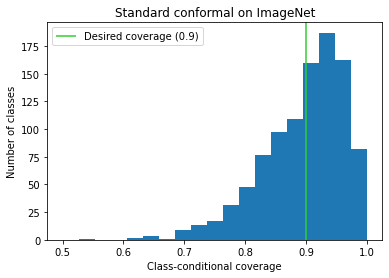

In [4]:
bins = np.linspace(0.5, 1, 20)
plt.hist(results['standard'][2]['raw_class_coverages'], bins=bins)
plt.xlabel('Class-conditional coverage')
plt.ylabel('Number of classes')

ymin, ymax = plt.ylim()
plt.vlines(x=0.9, ymin=ymin, ymax=ymax, label='Desired coverage (0.9)', color='limegreen')
plt.ylim(ymin, ymax)

plt.title('Standard conformal on ImageNet')
plt.legend(loc='upper left')
plt.show()

In [5]:
print('Class-conditional coverages:')
print(results['standard'][2]['raw_class_coverages'])

Class-conditional coverages:
[0.95848057 0.98090278 0.94117647 0.90685859 0.92560554 0.88640275
 0.94952951 0.96210164 0.92355556 0.98613518 0.96681223 0.98515284
 0.98526863 0.98339161 0.98594025 0.97535211 0.99136442 0.97554585
 0.9554413  0.99035933 0.95175439 0.95934256 0.98415493 0.96167247
 0.9877836  0.95192308 0.88       0.92699491 0.9470538  0.96327925
 0.96709957 0.96007098 0.90933333 0.90517241 0.89063867 0.88763066
 0.8558952  0.95742832 0.92650919 0.93825043 0.95829713 0.90932868
 0.94596988 0.91758794 0.92643285 0.96832192 0.836966   0.96575342
 0.98615917 0.93787748 0.95438596 0.98931434 0.83333333 0.92788879
 0.8194325  0.86215979 0.95750217 0.96440972 0.90740741 0.91989437
 0.74558304 0.93410508 0.84479167 0.95081967 0.92957746 0.90339426
 0.79020979 0.88636364 0.85008666 0.9675491  0.96462468 0.96575342
 0.98167539 0.77873812 0.78497409 0.97243755 0.96140351 0.94323144
 0.94220665 0.95368782 0.90964379 0.97048611 0.91804708 0.92857143
 0.97829861 0.95462478 0.7677643 

In [6]:
print('==== Most undercovered class under standard ====')
most_undercov = results['standard'][2]['raw_class_coverages'].argmin()
print('Class:', most_undercov)
print('Coverage under standard :', results['standard'][2]['raw_class_coverages'][most_undercov])
print('Coverage under clustered:', results['cluster_random'][2]['raw_class_coverages'][most_undercov])
print('Coverage under classwise:', results['classwise'][2]['raw_class_coverages'][most_undercov])

==== Most undercovered class under standard ====
Class: 899
Coverage under standard : 0.49956634865568084
Coverage under clustered: 0.7476149176062445
Coverage under classwise: 0.8907198612315698


Class 889 corresponds to water jug

In [7]:
print('==== Most overcovered class under standard ====')
most_overcov = results['standard'][2]['raw_class_coverages'].argmax()
print('Class:', most_overcov)
print('Coverage under standard :', results['standard'][2]['raw_class_coverages'][most_overcov])
print('Coverage under clustered:', results['cluster_random'][2]['raw_class_coverages'][most_overcov])
print('Coverage under classwise:', results['classwise'][2]['raw_class_coverages'][most_overcov])

==== Most overcovered class under standard ====
Class: 339
Coverage under standard : 0.996548748921484
Coverage under clustered: 0.9836065573770492
Coverage under classwise: 0.9301121656600517


Class 339 corresponds to "sorrel," which is not a very common thing. Let's find another overcovered class that is more familiar

In [8]:
print('Classes with coverage above 99%:')
np.where(results['standard'][2]['raw_class_coverages'] > .99)

Classes with coverage above 99%:


(array([ 16,  19, 102, 105, 130, 289, 321, 323, 339, 340, 387, 388]),)

Some classes that correspond to common things:
* 102 = koala
* 105 = flamingo
* 289 = leopard

In [9]:
cls = 105

print(f'Class-conditional coverage of Class {cls}:')
results['standard'][2]['raw_class_coverages'][cls]

Class-conditional coverage of Class 105:


0.9912049252418645

## Some addititional code for comparing against other conformal methods

In [10]:
# # For comparison
# print('==== Most undercovered class under clustered ====')
# method = 'cluster_proportional'
# most_undercov = results[method][2]['raw_class_coverages'].argmin()
# print('Class:', most_undercov)
# print('Coverage:', results[method][2]['raw_class_coverages'][most_undercov])

In [11]:
# n_totalcal = 20
# score = 'softmax'
# folder = f'/home/tding/code/class-conditional-conformal/.cache/paper/varying_n/{dataset}/random_calset/n_totalcal={n_totalcal}/score={score}'
# plot_class_coverage_histogram(folder, desired_cov=0.9, vmin=.5, vmax=1, nbins=30, 
#                               methods = ['standard', 'classwise', 'cluster_random'],
#                               title=f'ImageNet, n={n_totalcal}, {score}')